In [69]:
# Importing necessary modules to analyze and visualize the climate of Honolulu, Hawaii.
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import pandas as pd
import matplotlib.dates as mdates

In [2]:
# setting path to hawaii.sqlite file.
database_path = "Resources/hawaii.sqlite"

In [3]:
# creating a variable that creates and holds the starting point and home base of interaction between us(python) and the hawaii.sqlite database/local files.
engine = create_engine(f"sqlite:///{database_path}")

In [4]:
# using the automap_base  and prepare functions to create an automated mapping of the hawaii.sqlite database, such as a general layout of how the data is structured and related.
Base = automap_base()
# Using the prepare function to reflect the mapping.
Base.prepare(engine, reflect=True)

In [5]:
# Using the functional Base variable created above to find out the names of the hawaii.sqlite classes/tables the automapping above created.
Base.classes.keys()

['measurement', 'station']

In [6]:
# saving the tabels that the automapping is referencing to variables for operation later on.
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# creating a session variable that will allow the our python scripts to communicate with the hawaii database.
session = Session(engine)

In [8]:
# using the __dict__ function to get a feel for the mapping of the Measurement table.
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2527f2906d8>,
 'id': 1,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01'}

In [9]:
# using the __dict__ function like above to see the station data.
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x25202637a58>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [10]:
# seeing how  many years of data we have(2011-2017).
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [11]:
# obtaining only the date and precipiation columns and filtering out so we only have 2017 data.
date_str = "2017"
data_2017 = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime("%Y", Measurement.date) == date_str).all()

In [205]:
# creating a pandas dataframe out of the data_2017 data created above.
pandas_data_2017 = pd.DataFrame(data_2017)

In [206]:
pandas_data_2017["date"] = pandas_data_2017["date"].astype("datetime64[ns]")

In [207]:
# previewing pandas_data_2017 data
pandas_data_2017.head()

,date,prcp
0,2017-01-01,0.0
1,2017-01-02,0.0
2,2017-01-03,0.0
3,2017-01-04,0.0
4,2017-01-05,0.0


In [208]:
# setting the pandas_data_2017 index as the date.
pandas_data_2017 = pandas_data_2017.set_index("date")

In [209]:
# previewing the change made above.
pandas_data_2017.head()

,prcp
date,
2017-01-01,0.0
2017-01-02,0.0
2017-01-03,0.0
2017-01-04,0.0
2017-01-05,0.0


In [210]:
# sorting the pandas_data_2017 to have all dates appear in order.
sorted_pandas_data_2017 = pandas_data_2017.sort_index()

In [211]:
# verifying the data is sorted by dates.
sorted_pandas_data_2017.head()

,prcp
date,
2017-01-01,0.00
2017-01-01,0.00
2017-01-01,0.03
2017-01-01,0.03
2017-01-01,0.29


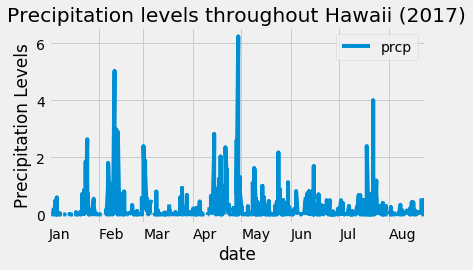

In [223]:
# creating a barchart that measures precipitation levels throughout 2017 by stations.
fig, ax = plt.subplots()
sorted_pandas_data_2017.plot(ax=ax)
# creating labels for the barchart.
plt.title("Precipitation levels throughout Hawaii (2017)")
plt.ylabel("Precipitation Levels")
# #set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
# #set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-0, ha="left" )
# saving bargraph as png file.
# plt.savefig("Precipitation levels throughout Hawaii in 2017")

In [225]:
# calculating the total number of weather stations in our database in hawaii.
number_of_stations = session.query(Station.id).count()
print(f"There are {number_of_stations} stations in our hawaii database")

There are 9 stations in our hawaii database


In [226]:
# counting the number of observations(temperature observations data) of each station from 2011-2017 and recording them in order from greatest to least in a list variable.
observation_count = session.query(Measurement.station, Station.station, func.count(Measurement.tobs)).\
    filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

In [227]:
# checking the results of the observation count query preformed above that is contained in a list variable.
observation_count

[('USC00519281', 'USC00519281', 2772),
 ('USC00519397', 'USC00519397', 2724),
 ('USC00513117', 'USC00513117', 2709),
 ('USC00519523', 'USC00519523', 2669),
 ('USC00516128', 'USC00516128', 2612),
 ('USC00514830', 'USC00514830', 2202),
 ('USC00511918', 'USC00511918', 1979),
 ('USC00517948', 'USC00517948', 1372),
 ('USC00518838', 'USC00518838', 511)]

In [228]:
# printing what station had most temperature observations from 2011-2017 and the ccorresponding number of recordings.
print(f"Station {observation_count[0][0]} had the most temperature observation data recordings totaling {observation_count[0][2]} from 2011-2017.")

Station USC00519281 had the most temperature observation data recordings totaling 2772 from 2011-2017.


In [229]:
# counting the number of temperature observations in 2017 according to each station and ordering them from greatest to least within a list variable.
data_str = "2017"
tobs_data = session.query(Measurement.station, Station.station, Measurement.tobs, func.count(Measurement.tobs)).\
    filter(Measurement.station == Station.station).\
    filter(func.strftime("%Y", Measurement.date) == date_str).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

In [230]:
# checking the results of the above procudure held in the tobs_data variable.
tobs_data

[('USC00519397', 'USC00519397', 62.0, 230),
 ('USC00516128', 'USC00516128', 68.0, 222),
 ('USC00519281', 'USC00519281', 72.0, 221),
 ('USC00513117', 'USC00513117', 66.0, 212),
 ('USC00519523', 'USC00519523', 74.0, 210),
 ('USC00514830', 'USC00514830', 74.0, 195),
 ('USC00517948', 'USC00517948', 65.0, 107)]

In [231]:
# verifing name of station with most frequent temp observations.
tobs_data[0][0]

'USC00519397'

In [232]:
# Based on the above filtration, filtering the data to give us only the data of the station that had the most temperature observations in 2017.
date_str = "2017"
most_frequent_data = session.query(Measurement.station, Station.station, Station.name, Measurement.tobs, Measurement.date).\
    filter(Measurement.station == Station.station).\
    filter(func.strftime("%Y", Measurement.date) == date_str).\
    filter(Measurement.station == tobs_data[0][0]).all()

In [237]:
# verifing the above process worked.
most_frequent_data[0:10]

[('USC00519397', 'USC00519397', 'WAIKIKI 717.2, HI US', 62.0, '2017-01-01'),
 ('USC00519397', 'USC00519397', 'WAIKIKI 717.2, HI US', 66.0, '2017-01-02'),
 ('USC00519397', 'USC00519397', 'WAIKIKI 717.2, HI US', 63.0, '2017-01-03'),
 ('USC00519397', 'USC00519397', 'WAIKIKI 717.2, HI US', 62.0, '2017-01-04'),
 ('USC00519397', 'USC00519397', 'WAIKIKI 717.2, HI US', 63.0, '2017-01-05'),
 ('USC00519397', 'USC00519397', 'WAIKIKI 717.2, HI US', 64.0, '2017-01-06'),
 ('USC00519397', 'USC00519397', 'WAIKIKI 717.2, HI US', 66.0, '2017-01-07'),
 ('USC00519397', 'USC00519397', 'WAIKIKI 717.2, HI US', 60.0, '2017-01-08'),
 ('USC00519397', 'USC00519397', 'WAIKIKI 717.2, HI US', 64.0, '2017-01-09'),
 ('USC00519397', 'USC00519397', 'WAIKIKI 717.2, HI US', 63.0, '2017-01-10')]

In [238]:
# creating a pandas dataframe from above list in order to create a histogram.
pandas_most_frequent_data = pd.DataFrame(most_frequent_data, columns=["Station", "Stations","Name of Station", "Temperature Observation", "Date"])

In [239]:
# removing the station columnns and date column.
pandas_most_frequent_data = pandas_most_frequent_data[["Name of Station", "Temperature Observation"]]

In [240]:
# previewing the pandas_most_frequent_data dataframe.
pandas_most_frequent_data.head()

,Name of Station,Temperature Observation
0,"WAIKIKI 717.2, HI US",62.0
1,"WAIKIKI 717.2, HI US",66.0
2,"WAIKIKI 717.2, HI US",63.0
3,"WAIKIKI 717.2, HI US",62.0
4,"WAIKIKI 717.2, HI US",63.0


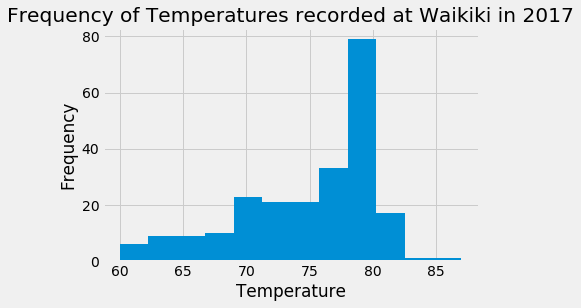

In [244]:
# creating a histogram that shows the most frequent temperature observations in 2017 at Waikiki, which had the most temperature observations out of all the weather stations..
pandas_most_frequent_data.hist(bins=12)
# labeling the histogram.
plt.title("Frequency of Temperatures recorded at Waikiki in 2017")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
# saving histogram as png file.
# plt.savefig("Frequency of Temperatures recorded at Waikiki (station with most observations) in 2017")